In [1]:
# Importing Warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing useful libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
pd.set_option("max_columns",100)
pd.set_option("max_rows",400)

In [4]:
# Reading the data set
df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.shape

(1460, 81)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# Checking Null Values
round((df.isnull().sum().sort_values(ascending = False)*100)/len(df), 2)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageCond        5.55
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageQual        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
Utilities         0.00
YearRemodAdd      0.00
MSSubClass        0.00
Foundation        0.00
ExterCond         0.00
ExterQual         0.00
Exterior2nd       0.00
Exterior1st       0.00
RoofMatl          0.00
RoofStyle         0.00
YearBuilt         0.00
LotConfig         0.00
OverallCond       0.00
OverallQual       0.00
HouseStyle        0.00
BldgType          0.00
Condition2        0.00
BsmtFinSF1        0.00
MSZoning          0.00
LotArea           0.00
Street            0.00
Condition1        0.00
Neighborhood      0.00
LotShape          0.00
LandContour

Inference: Column names PoolQC , MiscFeature,Alley,Fence has more than 80 percent null values, here null values means no pool, no miscfeature, no alley acess, no fence.

In [8]:
# In column names PoolQC, MiscFeature, Alley,Fence null values means No pool, None, No alley acess, No Fence so we we will replace null values with it
df['PoolQC'].fillna('No Pool', inplace=True) 
df['MiscFeature'].fillna('None', inplace=True) 
df['Alley'].fillna('No alley acess', inplace=True) 
df['Fence'].fillna('No Fence', inplace=True) 

In [9]:
round((df.isnull().sum().sort_values(ascending = False)*100)/len(df), 2).head()

FireplaceQu    47.26
LotFrontage    17.74
GarageType      5.55
GarageCond      5.55
GarageYrBlt     5.55
dtype: float64

In [10]:
df['FireplaceQu'].value_counts() 

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [11]:
# there are 47 percente null values in FirePlaceQu column but here null values means 'No Fireplace', so we will replace with it
df['FireplaceQu'] = df['FireplaceQu'].fillna('No Fireplace')

In [12]:
df['LotFrontage'].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
24.0      19
64.0      19
73.0      18
72.0      17
79.0      17
63.0      17
55.0      17
100.0     16
51.0      15
66.0      15
74.0      15
52.0      14
59.0      13
71.0      12
82.0      12
40.0      12
43.0      12
67.0      12
57.0      12
69.0      11
76.0      11
86.0      10
53.0      10
34.0      10
92.0      10
88.0      10
62.0       9
44.0       9
84.0       9
77.0       9
35.0       9
93.0       8
61.0       8
98.0       8
96.0       8
107.0      7
120.0      7
95.0       7
58.0       7
41.0       6
30.0       6
81.0       6
89.0       6
105.0      6
48.0       6
110.0      6
94.0       6
54.0       6
91.0       6
36.0       6
47.0       5
37.0       5
83.0       5
56.0       5
87.0       5
32.0       5
42.0       4
49.0       4
102.0      4
103.0      3
108.0      3
99.0       3
104.0      3
45.0       3
130.0      3
174.0      2

In [13]:
df['LotFrontage'] = df['LotFrontage'].replace(np.nan, df['LotFrontage'].median())

In [14]:
df['GarageYrBlt'].value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
1977.0    35
1998.0    31
1999.0    30
2008.0    29
1976.0    29
2000.0    27
2002.0    26
1968.0    26
1950.0    24
1993.0    22
2009.0    21
1965.0    21
1966.0    21
1962.0    21
1958.0    21
2001.0    20
1996.0    20
1957.0    20
1970.0    20
1960.0    19
1997.0    19
1978.0    19
1954.0    19
1974.0    18
1994.0    18
1995.0    18
1964.0    18
1959.0    17
1963.0    16
1990.0    16
1956.0    16
1969.0    15
1979.0    15
1980.0    15
1967.0    15
1988.0    14
1973.0    14
1940.0    14
1920.0    14
1972.0    14
1961.0    13
1971.0    13
1955.0    13
1992.0    13
1953.0    12
1987.0    11
1948.0    11
1985.0    10
1981.0    10
1941.0    10
1925.0    10
1989.0    10
1975.0     9
1991.0     9
1939.0     9
1984.0     8
1949.0     8
1930.0     8
1983.0     7
1986.0     6
1951.0     6
1926.0     6
1922.0     5
1936.0     5
1916.0     5
1931.0     4
1945.0     4
1935.0     4
1928.0     4
1946.0     4
1982.0     4
1938.0     3

In [15]:
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)
df['GarageYrBlt'] = df['GarageYrBlt'].astype('int')

In [16]:
# Replacing null values of Columns 'GarageType','GarageFinish','GarageQual','GarageCond' with 'None' because here NA means no garage
columns = ['GarageType','GarageFinish','GarageQual','GarageCond']
for col in columns:
    df[col] = df[col].fillna('None')

In [17]:
# Replacing null values of columns BsmtExposure, BsmtFinType2, BsmtFinType1,BsmtCond, BsmtQual with 'None' beacause here null values means no basement
columns = ['BsmtExposure', 'BsmtFinType2', 'BsmtFinType1','BsmtCond', 'BsmtQual']
for col in columns:
    df[col] = df[col].fillna('None')

In [18]:
df['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [19]:
#Replacing null values with most frequently occuring values in the features
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['MasVnrArea'] = df['MasVnrArea'].replace(np.nan, df['MasVnrArea'].median())

In [20]:
df['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [21]:
# Imputing null value with most occuring value in the feature
df['Electrical'] = df['Electrical'].fillna('SBrkr')

In [22]:
round((df.isnull().sum().sort_values(ascending = False)/len(df))*100,2).head()

SalePrice      0.0
Heating        0.0
RoofStyle      0.0
RoofMatl       0.0
Exterior1st    0.0
dtype: float64

In [23]:
df.shape

(1460, 81)

#### Checking Duplicate Values

In [24]:
df[df.duplicated(keep = False)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


#### Outlier Treatment

In [25]:
df.describe(percentiles = [.25,.50,.75,.90,.95,.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1868.739726,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,453.697295,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1958.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1977.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
90%,1314.100000,120.000000,92.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,0.000000,2158.300000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,9.000000,1.000000,2006.000000,3.000000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,278000.000000
95%,1387.050000,160.000000,104.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,0.000000,2466.100000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,10.000000,2.000000,2007.000000,3.000000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,326100.000000
99%,144

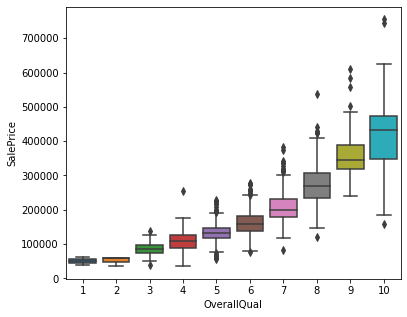

In [26]:
fig,ax = plt.subplots(figsize = (6,5))
fig = sns.boxplot(x = df['OverallQual'], y = df['SalePrice'])

Inference: As we can seen if overallQual increases then sale is also increases and it is fact if  quality is more thn sale is also more

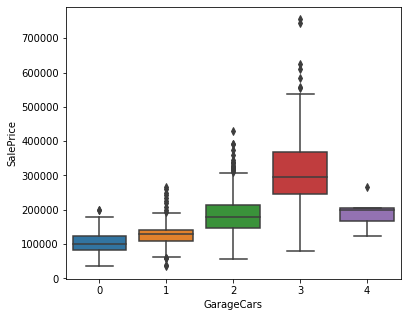

In [27]:
fig,ax = plt.subplots(figsize = (6,5))
fig = sns.boxplot(x = df['GarageCars'], y = df['SalePrice'])

##### INFERENCE: 

As we can see if size of Garage in car capicty is 3 the price is more but if GarageCars of capicty 4 then price is less, so it can be observed this is outlier

In [28]:
# Removing Outlier
percentiles = df['GarageCars'].quantile([0.01,0.99]).values
df['GarageCars'][df['GarageCars'] <= percentiles[0]] = percentiles[0]
df['GarageCars'][df['GarageCars'] >= percentiles[1]] = percentiles[1]

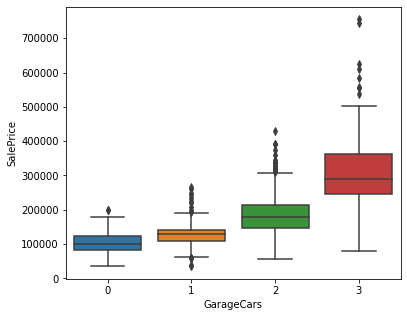

In [29]:
# Checking after removing outlier in GarageCars column
fig,ax = plt.subplots(figsize = (6,5))
fig = sns.boxplot(x = df['GarageCars'], y = df['SalePrice'])

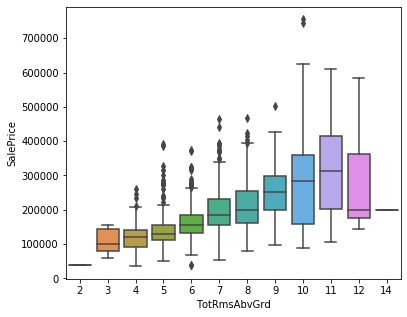

In [30]:
fig,ax = plt.subplots(figsize = (6,5))
fig = sns.boxplot(x = df['TotRmsAbvGrd'], y = df['SalePrice'])

##### INFERENCE: 
    
As observed here if total rooms above grade is above 11 or 12 then price is less

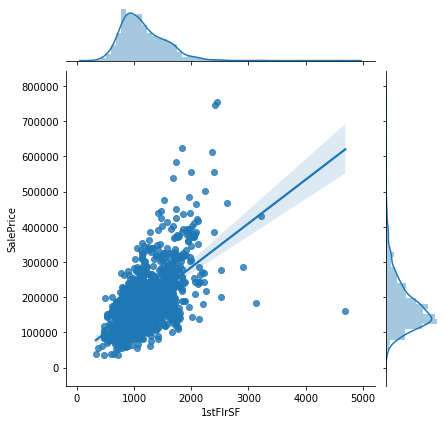

In [31]:
sns.jointplot(df['1stFlrSF'],df['SalePrice'],kind='reg', space = 0.2)

##### INFERENCE:
    
If first floor area increases then saleprice is also increasing and also observed here area between 500 to 2200 has most of the saleprice

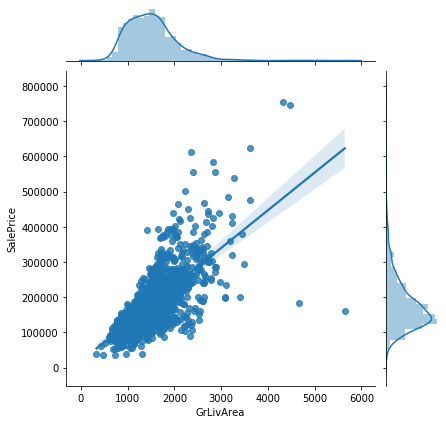

In [32]:
# Checking Outliers in GrLivArea
sns.jointplot(df['GrLivArea'],df['SalePrice'],kind='reg')

##### INFERENCE: 
    
We know if living area square feet increases then saleprice is also increases but as seen area above 4000  price is less so that is outlier

In [33]:
# Removing Outlier
percentiles = df['GrLivArea'].quantile([0.01,0.99]).values
df['GrLivArea'][df['GrLivArea'] <= percentiles[0]] = percentiles[0]
df['GrLivArea'][df['GrLivArea'] >= percentiles[1]] = percentiles[1]

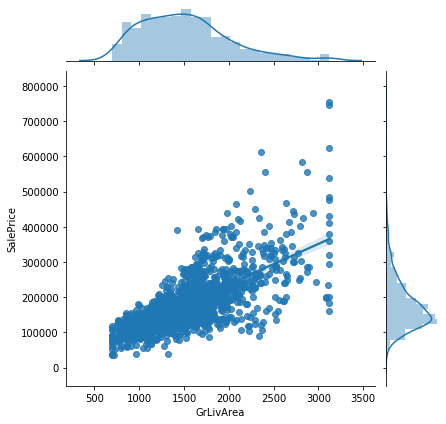

In [34]:
# After removing outliers
sns.jointplot(df['GrLivArea'],df['SalePrice'],kind='reg')

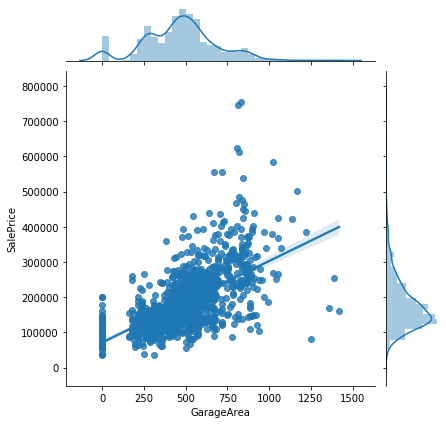

In [35]:
sns.jointplot(df['GarageArea'],df['SalePrice'],kind='reg')

##### Inference:
    
If Area is between 200 to 1100 then saleprice is increasing but if area is greater than 110 then sales price is less. so this is outlier

In [36]:
# Removing Outlier
percentiles = df['GarageArea'].quantile([0.01,0.99]).values
df['GarageArea'][df['GarageArea'] <= percentiles[0]] = percentiles[0]
df['GarageArea'][df['GarageArea'] >= percentiles[1]] = percentiles[1]

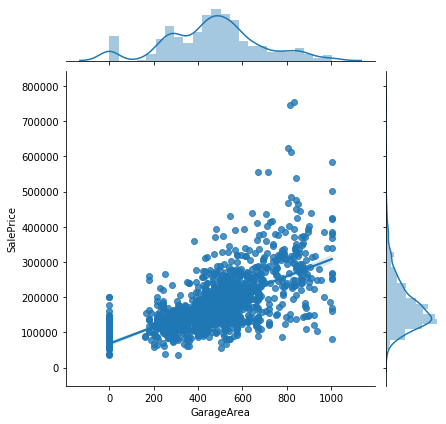

In [37]:
# After removing outliers in GarageArea Column
sns.jointplot(df['GarageArea'],df['SalePrice'],kind='reg')

In [38]:
col = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', '2ndFlrSF',
           'LowQualFinSF', 'WoodDeckSF','PoolArea',  'MiscVal','OpenPorchSF']

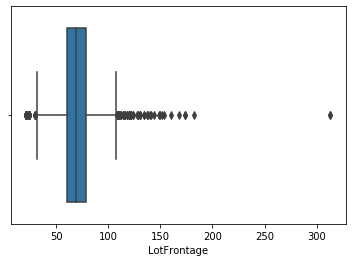

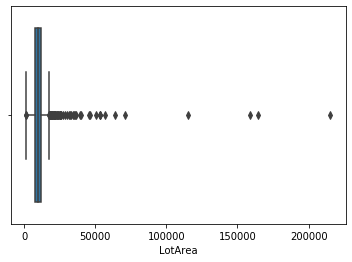

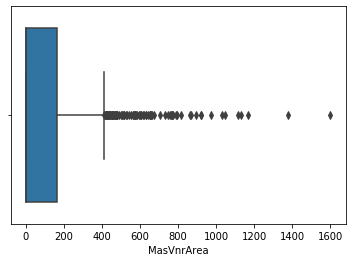

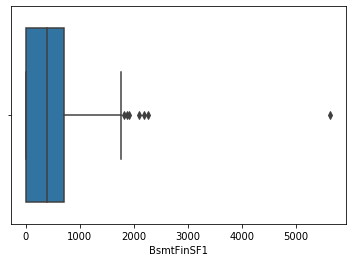

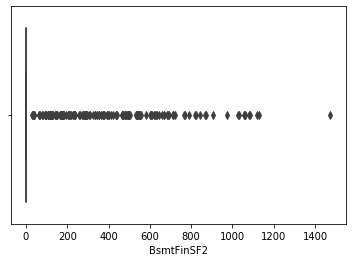

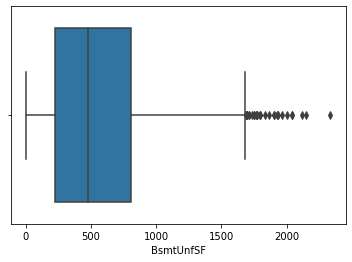

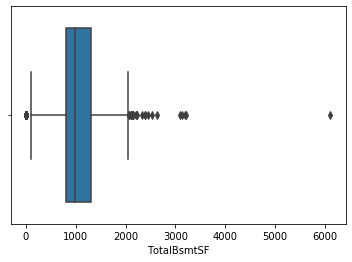

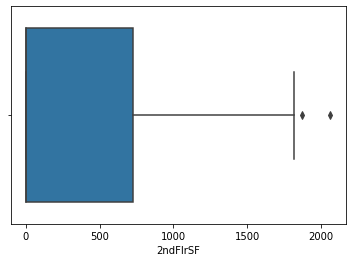

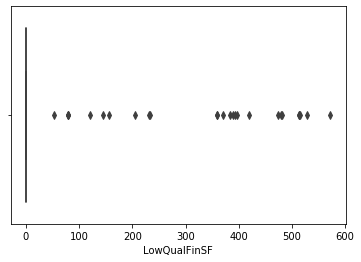

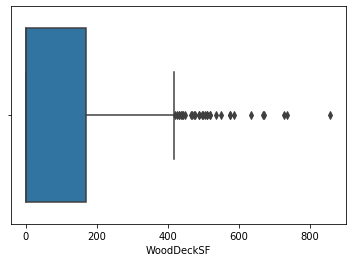

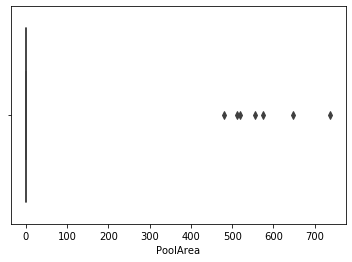

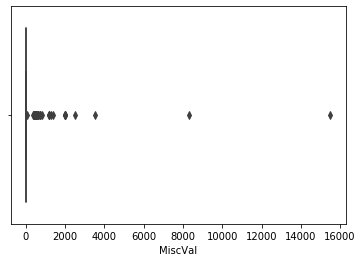

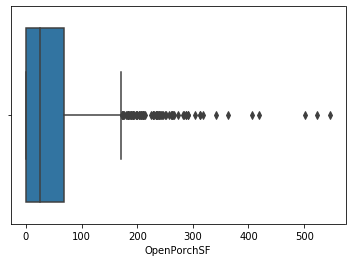

In [39]:
for c in col:
    sns.boxplot(df[c])
    plt.show()

In [40]:
df.shape

(1460, 81)

In [41]:
# Removing outliers beyond 98% 
quartile_MasVnrArea = df['MasVnrArea'].quantile(0.98)
df = df[df["MasVnrArea"] < quartile_MasVnrArea]


quartile_LotArea = df['LotArea'].quantile(0.98)
df = df[df["LotArea"] < quartile_LotArea]


In [42]:
# Removing outliers beyond 99%

quartile_OpenPorchSF = df['OpenPorchSF'].quantile(0.99)
df = df[df["OpenPorchSF"] < quartile_OpenPorchSF]

quartile_WoodDeckSF = df['WoodDeckSF'].quantile(0.99)
df = df[df["WoodDeckSF"] < quartile_WoodDeckSF]

quartile_TotalBsmtSF = df['TotalBsmtSF'].quantile(0.99)
df = df [df["TotalBsmtSF"] < quartile_TotalBsmtSF]


In [43]:
# Coverting Year columns into number of Years
df['YearRemodAdd'] = 2019 - df['YearRemodAdd']
df['YrSold'] = 2019 - df['YrSold']
df['GarageYrBlt'] = 2019 - df['GarageYrBlt']
df['YearBuilt'] = 2019 - df['YearBuilt']

In [44]:
# Checking Correlation between features
corr = df.corr()
corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.012384,-0.023526,-0.008187,-0.022601,0.012143,0.005977,0.010699,-0.045860,-0.013951,0.005726,-0.008183,-0.022107,-0.000647,-0.005766,-0.038792,-0.008826,0.008880,-0.015810,0.002954,-0.000119,0.014497,-0.000287,0.017198,-0.009763,-0.011685,0.012874,0.011547,-0.040004,-0.037489,0.014981,-0.047645,-0.009066,0.041377,-0.006902,0.020420,0.007798,-0.024163
MSSubClass,0.012384,1.000000,-0.403326,-0.398683,0.060718,-0.058036,-0.032731,-0.048211,0.021708,-0.071213,-0.050468,-0.130675,-0.246627,-0.254580,0.318043,0.046117,0.106215,0.009381,0.000250,0.147130,0.187859,-0.035270,0.296580,0.050923,-0.029764,0.084432,-0.043383,-0.105737,-0.030032,0.005899,-0.011045,-0.046165,-0.018947,-0.005984,-0.010705,-0.012590,0.013342,-0.068842
LotFrontage,-0.023526,-0.403326,1.000000,0.574334,0.192759,-0.050342,-0.119562,-0.067247,0.165744,0.108566,0.027716,0.139512,0.287917,0.343528,0.060620,0.020484,0.307025,0.032523,-0.016560,0.168617,0.042263,0.256652,0.002840,0.305377,0.205692,-0.096905,0.273361,0.302620,0.080490,0.136860,-0.002089,0.079669,0.053832,0.022113,0.005469,0.025829,-0.004181,0.345724
LotArea,-0.008187,-0.398683,0.574334,1.000000,0.180012,-0.008772,-0.054883,-0.038522,0.102009,0.139579,0.069423,0.090098,0.282686,0.389221,0.125486,0.027357,0.397142,0.058573,0.032452,0.191792,0.099591,0.293896,-0.016670,0.376031,0.309225,-0.135394,0.267048,0.298015,0.143465,0.138250,0.001997,0.096644,0.099891,0.034062,0.064728,0.040020,0.026574,0.385679
OverallQual,-0.022601,0.060718,0.192759,0.180012,1.000000,-0.089112,-0.576656,-0.546816,0.362803,0.191424,-0.063925,0.288506,0.509517,0.430945,0.275543,-0.035460,0.556601,0.099464,-0.037383,0.540743,0.247302,0.110605,-0.186321,0.388827,0.379317,-0.295675,0.592704,0.542757,0.219374,0.360073,-0.122931,0.039724,0.071313,0.009656,-0.027763,0.084960,0.028809,0.800319
OverallCond,0.012143,-0.058036,-0.050342,-0.008772,-0.089112,1.000000,0.375040,-0.073567,-0.124712,-0.021226,0.046385,-0.140263,-0.163294,-0.136434,0.030765,0.033571,-0.076704,-0.041629,0.121237,-0.201578,-0.050859,0.019058,-0.077566,-0.046520,-0.016112,0.003100,-0.177845,-0.134818,0.003898,-0.057063,0.088768,0.024752,0.063212,0.004710,0.066061,-0.011678,-0.037075,-0.069103
YearBuilt,0.005977,-0.032731,-0.119562,-0.054883,-0.576656,0.375040,1.000000,0.596291,-0.299382,-0.246362,0.044591,-0.139066,-0.407487,-0.281612,0.002640,0.182689,-0.188970,-0.190483,0.030666,-0.482365,-0.223563,0.066607,0.171325,-0.073717,-0.140211,0.268235,-0.540507,-0.481619,-0.239119,-0.276112,0.399152,-0.034127,0.048317,-0.008255,0.031310,-0.028169,-0.017520,-0.557645
YearRemodAdd,0.010699,-0.048211,-0.067247,-0.038522,-0.546816,-0.073567,0.596291,1.000000,-0.143138,-0.121496,0.065987,-0.174371,-0.302998,-0.242724,-0.124834,0.065396,-0.281982,-0.124856,0.009425,-0.440899,-0.168327,0.033003,0.146608,-0.170936,-0.096779,0.144247,-0.418813,-0.368252,-0.233935,-0.288797,0.206548,-0.048303,0.034528,-0.002037,0.006595,-0.023939,0.030340,-0.543914
MasVnrArea,-0.045860,0.021708,0.165744,0.102009,0.362803,-0.124712,-0.299382,-0.143138,1.000000,0.214432,-0.056792,0.087063,0.308681,0.299204,0.107706,-0.076053,0.308991,0.088155,0.034218,0.235413,0.161658,0.122582,-0.017868,0.242085,0.227263,-0.140769,0.335539,0.336286,0.120860,0.163837,-0.109242,0.042694,0.071248,0.002333,-0.028180,0.028984,0.003625,0.404548
BsmtFinSF1,-0.013951,-0.071213,0.108566,0.139579,0.191424,-0.021226,-0.246362,-0.121496,0.214432,1.000000,-0.059358,-0.558629,0.428506,0.349434,-0.196607,-0.076221,0.070183,0.647763,0.084114,0.029833,-0.032649,-0.114880,-0.079889,-0.039287,0.200800,-0.113871,0.193518,0.2

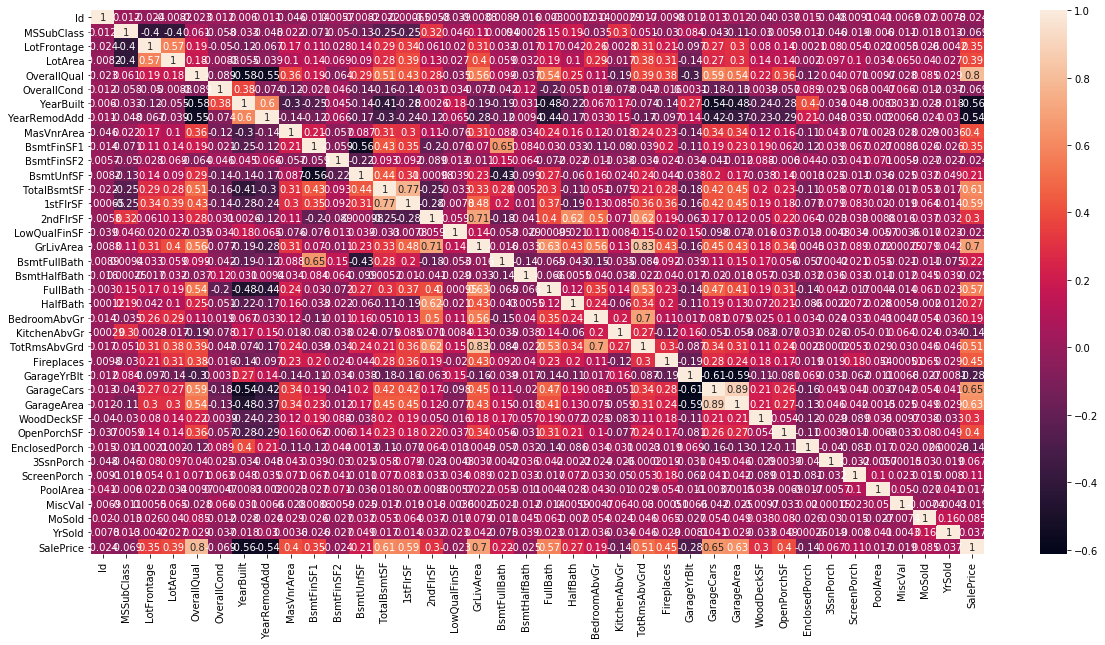

In [45]:
# Plotting heatmap to check correlation between features
plt.figure(figsize = (20,10))
sns.heatmap(corr, annot = True)

In [46]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [47]:
# These are ordinal categorical columns so we will replace values in sequence
df['LandSlope'] = df['LandSlope'].map({'Sev': 2,'Mod':1,'Gtl': 0})
df['KitchenQual'] = df['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df['HeatingQC'] = df['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df['FireplaceQu'] = df['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'No Fireplace': 0})
df['ExterQual'] = df['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
df['BsmtQual'] = df['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df['BsmtExposure'] = df['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
df['BsmtCond'] = df['BsmtCond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df['GarageQual'] = df['GarageQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df['GarageCond'] = df['GarageCond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df['LotShape'] = df['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
df['BsmtFinType1'] = df['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1,'None': 0})
df['BsmtFinType2'] = df['BsmtFinType2'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1,'None': 0})
df['GarageFinish'] = df['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
df['BldgType'] = df['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 'None': 0 })
df['HouseStyle'] = df['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, 
                                                                 '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })
df['Fence'] = df['Fence'].map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'No Fence': 0 })
df['LotConfig'] = df['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 'None': 0  })
df['CentralAir'] = df['CentralAir'].map({'Y':1,'N':0})

df['ExterCond'] = df['ExterCond'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0})

In [48]:
# Dummy Variables
df['Utilities'] = df['Utilities'].map({'AllPub': 1, "NoSeWa": 0})
df['Street']=df['Street'].map({'Pave':1,'Grvl':0})

In [49]:
#Creating dummy Variables
dummy_var = pd.get_dummies(df[['SaleCondition','MSZoning','GarageType','Exterior1st','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','MasVnrType','RoofStyle','RoofMatl','Exterior2nd',
             'Foundation','Heating','Electrical','Functional','PavedDrive','SaleType','PoolQC','MiscFeature','Alley']],
                           drop_first=True)

df = pd.concat([df,dummy_var],axis=1)

df = df.drop(['SaleCondition','MSZoning','GarageType','Exterior1st','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','MasVnrType','RoofStyle','RoofMatl','Exterior2nd',
             'Foundation','Heating','Electrical','Functional','PavedDrive','SaleType','PoolQC','MiscFeature','Alley'],axis=1)


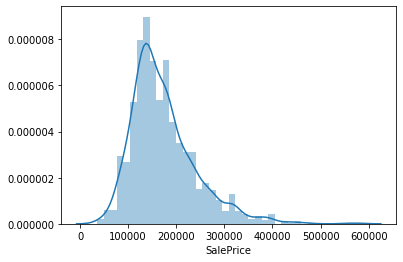

In [50]:
# Distribution of the target variable
sns.distplot(df['SalePrice'])

In [51]:
from scipy import stats
df['SalePrice'].skew() 

1.3229228667925461

In [52]:
df['SalePrice'].kurtosis()

2.9153607401245325

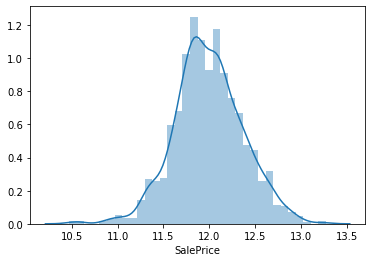

In [53]:
# The best way to remove skewness make it symmetric go for log transform
sns.distplot(np.log(df['SalePrice']))

Inference:  Now the target variable appear as normal Distribution

In [54]:
df['transformSalePrice'] = np.log(df['SalePrice'])

In [55]:
df[['SalePrice','transformSalePrice']].describe()

,SalePrice,transformSalePrice
count,1358.000000,1358.000000
mean,173463.765832,11.993488
std,67908.523249,0.374793
min,35311.000000,10.471950
25%,128500.000000,11.763684
50%,159000.000000,11.976659
75%,204975.000000,12.230643
max,582933.000000,13.275828


### Model Building

In [56]:
X = df.drop(['Id','SalePrice','transformSalePrice'], axis = 1)
y = df['transformSalePrice']

In [57]:
# spliting into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [58]:
# checking length of X_train
len(X_train.columns)

190

In [59]:
#Scaling the Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[-0.13951648, -0.88340805, -0.01444984, ..., -0.03246137,
         0.26194737, -0.16774543],
       [-0.62501338, -0.88340805, -0.12823955, ..., -0.03246137,
         0.26194737, -0.16774543],
       [ 0.34598043,  0.3257166 ,  0.99137479, ..., -0.03246137,
         0.26194737, -0.16774543],
       ...,
       [ 0.10323197,  0.58856978,  0.09169931, ..., -0.03246137,
         0.26194737, -0.16774543],
       [ 0.10323197,  0.01029278, -0.51899942, ..., -0.03246137,
         0.26194737, -0.16774543],
       [-0.86776184,  0.16800469,  0.14054429, ..., -0.03246137,
         0.26194737, -0.16774543]])

######  Recursive feature elimination

In [60]:
# importing useful libraries for linearRegression model and running RFE
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
lm  = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,50)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=50, step=1, verbose=0)

In [61]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('MSSubClass', False, 114),
 ('LotFrontage', False, 107),
 ('LotArea', False, 137),
 ('Street', True, 1),
 ('LotShape', False, 72),
 ('Utilities', True, 1),
 ('LandSlope', False, 22),
 ('OverallQual', True, 1),
 ('OverallCond', False, 63),
 ('YearBuilt', False, 117),
 ('YearRemodAdd', False, 110),
 ('MasVnrArea', False, 140),
 ('ExterQual', False, 93),
 ('ExterCond', False, 95),
 ('BsmtQual', False, 41),
 ('BsmtCond', False, 108),
 ('BsmtExposure', False, 87),
 ('BsmtFinType1', False, 97),
 ('BsmtFinSF1', False, 132),
 ('BsmtFinType2', False, 109),
 ('BsmtFinSF2', False, 133),
 ('BsmtUnfSF', False, 138),
 ('TotalBsmtSF', False, 130),
 ('HeatingQC', False, 83),
 ('CentralAir', True, 1),
 ('1stFlrSF', False, 118),
 ('2ndFlrSF', False, 119),
 ('LowQualFinSF', False, 120),
 ('GrLivArea', False, 122),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 25),
 ('FullBath', True, 1),
 ('HalfBath', False, 61),
 ('BedroomAbvGr', False, 136),
 ('KitchenAbvGr', False, 86),
 ('KitchenQual', False

In [62]:
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Street', 'Utilities', 'OverallQual', 'CentralAir', 'BsmtFullBath',
       'FullBath', 'GarageCars', 'SaleCondition_AdjLand', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_Stone', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor',
       'Neighborhood_MeadowV', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_Veenker', 'Condition1_RRNe',
       'Condition2_Feedr', 'Condition2_Norm', 'RoofStyle_Gable',
       'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofMatl_Metal',
       'RoofMatl_Tar&Grv', 'RoofMatl_WdShngl', 'Exterior2nd_BrkFace',
       'Exterior2nd_CBlock', 'Exterior2nd_CmentBd', 'Exterior2nd_Wd Shng',
       'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood',
       'Heating_Grav', 'Heating_Wall', 'Electrical_FuseP', 'Functional_Maj2',
       'Functional_Sev', 'SaleType_CWD', 'SaleType_ConL

In [63]:
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'LandSlope',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'PoolQC_Gd', 'PoolQC_No Pool', 'MiscFeature_TenC',
       'Alley_No alley acess', 'Alley_Pave'],
      dtype='object', length=140)

In [64]:
# filter the train and test set for RFE selected columns
rfe = RFE(lm, 50)            
rfe = rfe.fit(X_train, y_train)

In [65]:
# Fitting linear regression model
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
# importing library for finding squared error
from sklearn.metrics import mean_squared_error, r2_score

In [67]:
# Prediction on linear regression model and finding MSE, RMSE, r2_score
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

my_list1 = []
r2_train1 = r2_score(y_train, y_pred_train)
print(r2_train1)
my_list1.append(r2_train1)

r2_test1 = r2_score(y_test, y_pred_test)
print(r2_test1)
my_list1.append(r2_test1)

rss_train1 = np.sum(np.square(y_train - y_pred_train))
print(rss_train1)
my_list1.append(rss_train1)

rss2_test1 = np.sum(np.square(y_test - y_pred_test))
print(rss2_test1)
my_list1.append(rss2_test1)

mse_train1 = mean_squared_error(y_train, y_pred_train)
print(mse_train1)
my_list1.append(mse_train1**0.5)

mse_test1 = mean_squared_error(y_test, y_pred_test)
print(mse_test1)
my_list1.append(mse_test1**0.5)

0.9425030000395531
0.8939194020798221
7.981868252759622
5.486963952781918
0.008401966581852233
0.013448441060739995


In [68]:
# Importing useful libraries for ridge and lasso regression
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model

#### Ridge Model

In [69]:
params = {
    'alpha': [0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2.0,3.0,4.0,
             5.0,6.0,7.0,8.0,9.0,10.0,20.0,50.0,100.0,500.0,1000.0]
}

In [70]:
#Fitting Ridge model
ridge = Ridge()


folds = 5
ridge_model = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0,
                                   50.0, 100.0, 500.0, 1000.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [71]:
# display the mean scores
ridge_model_results = pd.DataFrame(ridge_model.cv_results_)
ridge_model_results = ridge_model_results[ridge_model_results['param_alpha']<=500]
ridge_model_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
22,10,-0.069340,-0.081310,1
21,9,-0.069107,-0.081315,2
20,8,-0.068861,-0.081337,3
19,7,-0.068591,-0.081379,4
18,6,-0.068295,-0.081476,5
23,20,-0.071227,-0.081540,6
17,5,-0.067964,-0.081667,7
16,4,-0.067578,-0.081954,8
15,3,-0.067107,-0.082339,9
24,50,-0.074325,-0.082711,10


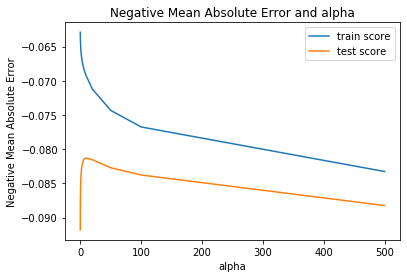

In [72]:
plt.plot(ridge_model_results['param_alpha'], ridge_model_results['mean_train_score'])
plt.plot(ridge_model_results['param_alpha'], ridge_model_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

##### Inference:

From above we came to know that the optimal value of lambda is 10 which has minimum gap between the training and test score

In [73]:
# get the best estimator for lambda
ridge_model.best_estimator_

Ridge(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [74]:
ridge_model.best_params_

{'alpha': 10.0}

In [75]:
# Fitting Ridge model
ridge = Ridge(alpha = 10.0)
ridge.fit(X_train,y_train)

Ridge(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [76]:
# predicting model on train and test set and checking r2_score, mean_squared_error
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

my_list2 = []
r2_train2 = r2_score(y_train, y_pred_train)
print(r2_train2)
my_list2.append(r2_train2)

r2_test2 = r2_score(y_test, y_pred_test)
print(r2_test2)
my_list2.append(r2_test2)

rss_train2 = np.sum(np.square(y_train - y_pred_train))
print(rss_train2)
my_list2.append(rss_train2)

rss2_test2 = np.sum(np.square(y_test - y_pred_test))
print(rss2_test2)
my_list2.append(rss2_test2)

mse_train2 = mean_squared_error(y_train, y_pred_train)
print(mse_train2)
my_list2.append(mse_train2**0.5)

mse_test2 = mean_squared_error(y_test, y_pred_test)
print(mse_test2)
my_list2.append(mse_test2**0.5)

0.9317892910191965
0.9152322200898101
9.469170441703671
4.384569486255623
0.009967547833372285
0.010746493838861821


In [77]:
parmtr = list(ridge.coef_)
parmtr.insert(0,ridge.intercept_)
col = X.columns
col.insert(0,'constant')
coefficients = pd.DataFrame(list(zip(col,parmtr)))
coefficients.columns = ['Feature','Coef']

In [78]:
coefficients.sort_values(by='Coef',ascending=False).head(10)

,Feature,Coef
0,MSSubClass,10.245066
93,Neighborhood_Edwards,0.088361
172,PavedDrive_P,0.070121
25,1stFlrSF,0.065764
63,MSZoning_RM,0.059734
60,MSZoning_FV,0.056457
59,SaleCondition_Partial,0.053872
8,OverallCond,0.051594
109,Neighborhood_Timber,0.050024
73,Exterior1st_CBlock,0.049908


#### The most  important  top five Predictor Variables given by ridge model are

MSSubClass

pavedDrive

MSZoning

Overallcond

Neighborhood_Edwards

#### Lasso Model

In [79]:
lasso = Lasso()


folds = 5
lasso_model = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
lasso_model.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    7.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0,
                                   50.0, 100.0, 500.0, 1000.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [80]:
# display the mean scores
lasso_model_results = pd.DataFrame(lasso_model.cv_results_)
lasso_model_results = lasso_model_results[lasso_model_results['param_alpha']<=500]
lasso_model_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
1,0.001,-0.073570,-0.081927,1
0,0.0001,-0.065511,-0.084270,2
2,0.01,-0.085697,-0.089376,3
3,0.05,-0.102500,-0.106346,4
4,0.1,-0.108860,-0.112455,5
5,0.2,-0.109765,-0.112871,6
6,0.3,-0.110487,-0.113287,7
7,0.4,-0.111394,-0.113920,8
8,0.5,-0.112255,-0.114773,9
9,0.6,-0.113260,-0.115799,10


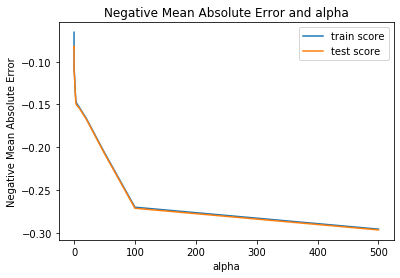

In [81]:
plt.plot(lasso_model_results['param_alpha'], lasso_model_results['mean_train_score'])
plt.plot(lasso_model_results['param_alpha'], lasso_model_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [82]:
# get the best estimator for lambda
lasso_model.best_estimator_

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [83]:
# Checking mean squared error
mean_squared_error(y_test, lasso_model.predict(X_test))

0.011087349692779603

In [84]:
# Assign the Features and their coefficient values to a dictionary which would be used while plotting the bar plot

lasso_coeff_dict = dict(pd.Series(lasso_model.best_estimator_.coef_.round(3), index = X_train.columns))
lasso_coeff_dict

{'MSSubClass': -0.0,
 'LotFrontage': 0.001,
 'LotArea': 0.0,
 'Street': 0.0,
 'LotShape': -0.001,
 'Utilities': 0.0,
 'LandSlope': 0.0,
 'OverallQual': 0.055,
 'OverallCond': 0.042,
 'YearBuilt': -0.002,
 'YearRemodAdd': -0.0,
 'MasVnrArea': -0.0,
 'ExterQual': 0.015,
 'ExterCond': -0.005,
 'BsmtQual': -0.0,
 'BsmtCond': -0.0,
 'BsmtExposure': 0.01,
 'BsmtFinType1': 0.005,
 'BsmtFinSF1': 0.0,
 'BsmtFinType2': -0.0,
 'BsmtFinSF2': 0.0,
 'BsmtUnfSF': 0.0,
 'TotalBsmtSF': 0.0,
 'HeatingQC': 0.019,
 'CentralAir': 0.056,
 '1stFlrSF': 0.001,
 '2ndFlrSF': 0.001,
 'LowQualFinSF': 0.001,
 'GrLivArea': -0.0,
 'BsmtFullBath': 0.001,
 'BsmtHalfBath': 0.0,
 'FullBath': 0.0,
 'HalfBath': 0.002,
 'BedroomAbvGr': 0.0,
 'KitchenAbvGr': -0.0,
 'KitchenQual': 0.014,
 'TotRmsAbvGrd': 0.002,
 'Fireplaces': 0.0,
 'FireplaceQu': 0.01,
 'GarageYrBlt': -0.0,
 'GarageFinish': 0.007,
 'GarageCars': 0.017,
 'GarageArea': 0.0,
 'GarageQual': 0.0,
 'GarageCond': 0.001,
 'WoodDeckSF': 0.0,
 'OpenPorchSF': 0.0,
 'Enc

In [85]:
lasso_model.best_params_

{'alpha': 0.001}

In [86]:
lasso = Lasso(alpha = 0.001)
lasso.fit(X_train,y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [87]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

my_list3 = []
r2_train3 = r2_score(y_train, y_pred_train)
print(r2_train3)
my_list3.append(r2_train3)

r2_test3 = r2_score(y_test, y_pred_test)
print(r2_test3)
my_list3.append(r2_test3)

rss_train3 = np.sum(np.square(y_train - y_pred_train))
print(rss_train3)
my_list3.append(rss_train3)

rss2_test3 = np.sum(np.square(y_test - y_pred_test))
print(rss2_test3)
my_list3.append(rss2_test3)

mse_train3 = mean_squared_error(y_train, y_pred_train)
print(mse_train3)
my_list3.append(mse_train3**0.5)

mse_test3 = mean_squared_error(y_test, y_pred_test)
print(mse_test3)
my_list3.append(mse_test3**0.5)

0.9222228180378598
0.9125435669868309
10.797210635681484
4.5236386746540775
0.01136548487966472
0.011087349692779603


In [88]:
parmtr = list(lasso.coef_)
parmtr.insert(0,lasso.intercept_)
col = X.columns
col.insert(0,'constant')
coefficients = pd.DataFrame(list(zip(col,parmtr)))
coefficients.columns = ['Feature','Coef']

In [89]:
coefficients.sort_values(by='Coef',ascending=False).head(10)

,Feature,Coef
0,MSSubClass,10.369362
93,Neighborhood_Edwards,0.095714
60,MSZoning_FV,0.095228
25,1stFlrSF,0.056186
8,OverallCond,0.054676
172,PavedDrive_P,0.051392
59,SaleCondition_Partial,0.050035
9,YearBuilt,0.042424
73,Exterior1st_CBlock,0.041207
113,Condition1_PosA,0.039010


#### The most important top five predictor variables given by lasso model are 
MSSubClass

pavedDrive

MSZoning

Overallcond

Neighborhood_Edwards



In [90]:
# Creating a table which contain all the metrics

data = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': my_list1,
        'Ridge Regression': my_list2,
        'Lasso Regression': my_list3
        }

data_new = pd.DataFrame(data)

In [91]:
data_new

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.942503,0.931789,0.922223
1,R2 Score (Test),0.893919,0.915232,0.912544
2,RSS (Train),7.981868,9.469170,10.797211
3,RSS (Test),5.486964,4.384569,4.523639
4,MSE (Train),0.091662,0.099838,0.106609
5,MSE (Test),0.115967,0.103665,0.105296


##### INFERENCE:

we can seen as train and test score is behaving differently for linear regression model which  looks like overfitting and ridge and lasso model gives same accuracy on train and test set which is good

### Conclusion

After creating model in both Ridge and Lasso we can see that the r2_scores are almost same for both of them but penality in lasso forces some of the coefficient estimates to be exactly equal to zero as lasso performs variable selection and model generated from the lasso are easy to interpret than those predicted by ridge regression. so lasso is better than ridge

Afetr comparing both models we can see that features are same 

MSSubClass --> Identifies the type of dwelling involved in the sale.

MSZoning --> Identifies the general zoning classification of the sale.

Overallcond --> Rates the overall condition of the house

Neighborhood_Edwards --> Physical locations within Ames city limits

PavedDrive--> Paved driveway

####  The optimal lambda value in case of Ridge and Lasso is as below:

Ridge - 10

Lasso - 0.001